<a href="https://colab.research.google.com/github/shiva148/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
pip install bing-image-downloader

In [94]:
from bing_image_downloader import downloader
downloader.download("moon",limit=20,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://wallpapershome.com/images/wallpapers/earth-2560x1440-moon-planet-star-5k-16639.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/deer-5120x2880-savanna-sunset-cute-animals-4480.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bishopvisitor.com/wp-content/uploads/2015/12/Aspen-under-Moon-Grimm-400x284.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thumbnails.kpopmap.com/2020/08/abs-sf9-jaeyoon-780.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/island_sunset-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.hdwallpapers.in/download/island_sunset-1280x800.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://static.jojowiki.com/images/thumb/3/34/C-Moon_Infobox_Manga.png/270px-C-Moon_Infobox_Manga.png
[%] File Downloaded

In [95]:
downloader.download("gulab jamun",limit=20,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.mintsrecipes.com/wp-content/uploads/Bread-Gulab-Jamun-recipe-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://kudlarecipes.com/wp-content/uploads/2018/02/Gulab-Jamun-Cake-Recipe.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.ootabox.com/wp-content/uploads/2018/12/ffc1419ff14072945e70ac55fc4654b7
[%] File Downloaded !

[%] Downloading Image #4 from http://i.ytimg.com/vi/e6ZIU-SgFxU/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i2.wp.com/savoryandsweetfood.com/wp-content/uploads/2015/03/img_6828-0.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.vegrecipesofindia.com/wp-content/uploads/2015/01/rabdi-recipe-traditional.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.surinamcooking.com/wp-content/uploads/visballetjes.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://w

In [96]:
downloader.download("sky",limit=20,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://wallpapershome.com/images/wallpapers/night-sky-1440x2560-night-city-earth-sky-stars-clouds-light-height-421.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://papers.co/wallpaper/papers.co-mz92-green-moss-flower-nature-34-iphone6-plus-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/road-1080x1920-sky-clouds-mountains-8k-17775.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://galleries.upskirtjerk.com/sky-naughty-panty-tease-photo/content/thumb-8.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://4kwallpapers.com/images/wallpapers/sunset-lavender-fields-lighthouse-orange-sky-flowers-640x1136-2516.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.brwnpaperbag.com/wp-content/uploads/2015/09/Ryo-Takemasa-2.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://w

In [115]:
# Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['moon','umbrella','gulab jamun']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [116]:
len(flat_data[0])

67500

In [117]:
150*150*3

67500

In [118]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

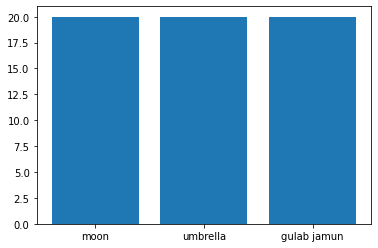

In [119]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [120]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
y_pred =clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0])

In [123]:
y_test

array([1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0])

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [126]:
accuracy_score(y_pred,y_test)

0.3333333333333333

In [127]:
confusion_matrix(y_pred,y_test)

array([[4, 6, 0],
       [1, 0, 2],
       [0, 3, 2]])

In [128]:
#save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [129]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://new.uniquejapan.com/wp-content/uploads/2010/03/Black-Soryu.jpg
(1641, 2100, 3)
 PREDICTED OUTPUT: umbrella


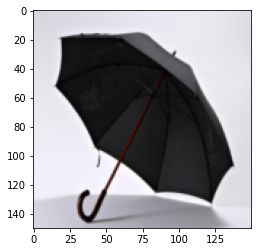

In [132]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 4.0MB/s 
     |████████████████████████████████| 174kB 34.8MB/s 
     |████████████████████████████████| 4.2MB 35.1MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 112kB 39.5MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 122kB 39.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=bf85033ed4c1f3471c29e15a00a701467879acc37555b6c8160f2e6463a37f86
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installation

     |████████████████████████████████| 747kB 4.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=30f1f9c1cec75a707cd0db0c1d893789decb26463b732829557dc0aaaf730155
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
